In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
### check the relationships between mean and std

In [4]:
locations = np.array([ 308,  309,  310,  312, 1775, 1776, 1777, 1780, 1782, 1783, 1784,
        1785, 1786, 1787, 1788, 1789, 1791, 1792, 1793, 1794, 1830, 1841,
        1851, 1857, 1858, 1863, 1867, 1868, 1870, 1871, 1879, 1883, 1887,
        2252, 2289, 2294])

In [5]:
R0 = 2.5
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])
export_dir = '../../../../../../Volumes/My Passport/branching/R025/'
Loc_log_mu = np.zeros((9,36))
Loc_mean = np.zeros((9,36))
Loc_log_sigma = np.zeros((9,36))
for r_idx in range(9):
    r = rs[r_idx]
    print(r)
    export_names = export_dir+'NewInf_R0-{}_r-{}.npy'.format(np.round(R0,2),np.round(r,2))
    En_NewInf = np.load(export_names)  
    ### select the ensembles in which the dieases does not die out
    valid_en = np.unique(np.where(En_NewInf[:,:,59]>1)[0])
    En_NewInf = En_NewInf[valid_en,:,:]
    En_NewInf[En_NewInf == 0] = 0.000000000000001
    log_i = np.log(En_NewInf) 
    print(log_i.shape)
    print('^___^')
    for l_idx in range(36):
        l = locations[l_idx]
#     print(l)
        data = En_NewInf[:,l,59]
        Loc_mean[r_idx,l_idx] = np.mean(data)
        
        log_data = log_i[:,l,59]
        mu = np.mean(log_data)
        sigma = np.std(log_data)
        Loc_log_mu[r_idx,l_idx] = mu
        Loc_log_sigma[r_idx,l_idx] = sigma
        
#         print('mean:', np.mean(data),'mu:',mu, 'scale:',np.exp(mu))

20.0
(200, 3142, 60)
^___^
10.0
(200, 3142, 60)
^___^
2.0
(200, 3142, 60)
^___^
1.0
(200, 3142, 60)
^___^
0.5
(200, 3142, 60)
^___^
0.2
(200, 3142, 60)
^___^
0.1
(200, 3142, 60)
^___^
0.05
(200, 3142, 60)
^___^
0.025
(186, 3142, 60)
^___^


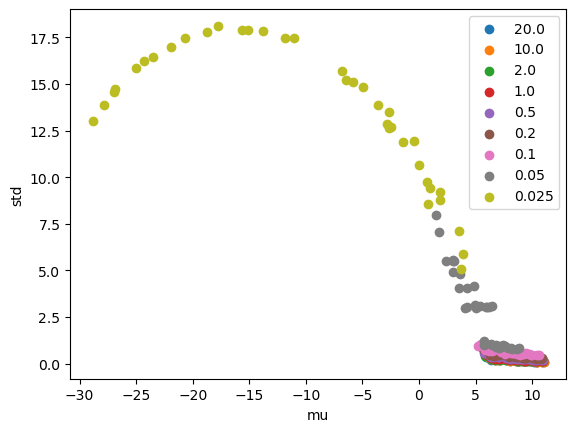

In [9]:
for r_idx in range(9):
    plt.scatter(Loc_log_mu[r_idx], Loc_log_sigma[r_idx], label=rs[r_idx])
plt.xlabel('mu')
plt.ylabel('std')
plt.legend()
plt.show()

In [81]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [91]:
xdata = []
for r_idx in range(7):
    r = rs[r_idx]
    xdata.extend(list(Loc_log_mu[r_idx]/r))

In [92]:
xdata = np.array(xdata)

(252,)

In [107]:
xdata = Loc_log_mu[:8].ravel()
ydata = Loc_log_sigma[:8].ravel()
popt, pcov = curve_fit(func, xdata, ydata)

In [108]:
popt

array([17.6472512 ,  0.4485613 , -0.11228123])

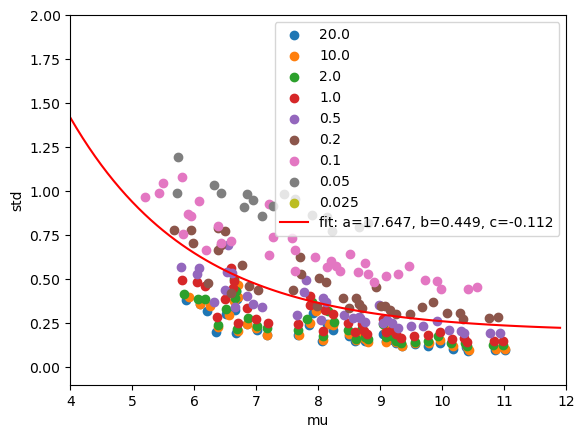

In [144]:
for r_idx in range(9):
    r = rs[r_idx]
    x = Loc_log_mu[r_idx]
    plt.scatter(x, Loc_log_sigma[r_idx], label=r)
#     y = np.sqrt(x**2*0.2 + 20)
#     y =  np.exp(2*x+1)
#     plt.scatter(x,y,label='fitted')
x_plot = np.arange(1,12,0.1)
plt.plot(np.arange(1,12,0.1), func(x_plot, 9 ,  0.5 , 0.2), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('mu')
plt.ylabel('std')
plt.legend()
plt.ylim(-0.1,2)
plt.xlim(4,12)
plt.show()

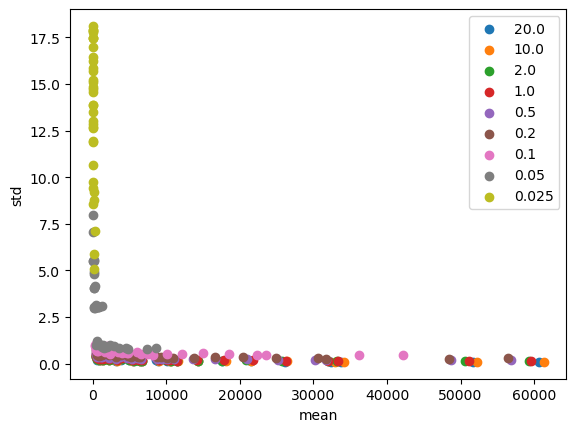

In [13]:
for r_idx in range(9):
    plt.scatter(Loc_mean[r_idx], Loc_log_sigma[r_idx], label=rs[r_idx])
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

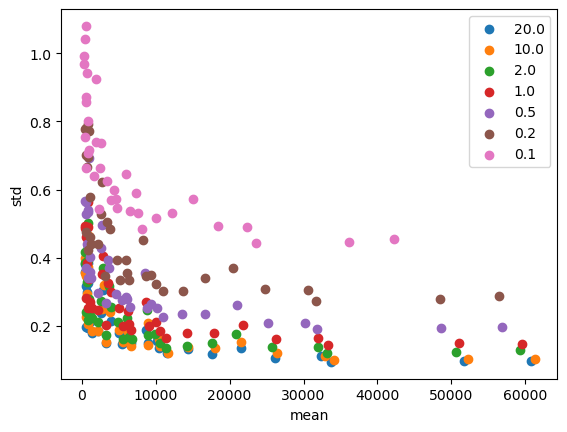

In [14]:
for r_idx in range(7):
    plt.scatter(Loc_mean[r_idx], Loc_log_sigma[r_idx], label=rs[r_idx])
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

In [155]:
observed_ts = En_NewInf[0]

In [6]:
export_dir = '../../../../../../Volumes/My Passport/branching/R025/'
Inference_mean = np.zeros((9,3142,60))
Inference_std = np.zeros((9,3142,60))
Inference_ensemble_std = np.zeros((9,3142,60))
Observation_i = np.zeros((9,3142,60))

for r_idx in range(9):
    
    r_i = rs[r_idx]
    print(r_i)
    file_name1 = export_dir + "NewInf_R0-{}_r-{}.npy" .format(np.round(R0,2),np.round(r_i,2))
    NewInf = np.load(file_name1)
    
    NewInf[NewInf == 0] = 0.000000000000001
    log_i = np.log(NewInf)
    log_avg_i = np.mean(log_i,axis=0)
    std_ens = np.std(log_i,axis=0)
    
    std_new = 9*np.exp(-0.5*log_avg_i) + 0.2
    
    Inference_mean[r_idx,:] = log_avg_i
    Inference_std[r_idx,:] = std_new
    Inference_ensemble_std[r_idx,:] = std_ens
    temp = NewInf[10,:,:]
    temp[temp==0] = 0.000000000000001
    
    obser_ts = np.log(temp) ## take the log
#     obser_ts = temp/pop[:,None]*100000
#     Observation_i[r_idx,:,:] = obser_ts
    Observation_i[r_idx,:,:] = temp

20.0
10.0
2.0
1.0
0.5
0.2
0.1
0.05
0.025


In [ ]:
th = 10
R_loglikelihood_sum = np.zeros((9,50)) ### different ranges
R_loglikelihood_maxtrix = dict()
for i in range(1,9):
    r_s_idx = rs_selected[i]
    r_s = rs[r_s_idx]
    
    observed_ts = Observation_i[r_s_idx]
    
    for r_idx in range(1,50):
        position = np.where(log_avg_i[:,59]>np.log(th))
        mle_matrix = observed_ts[position]
#         print(r_idx)
        mean_r = Inference_mean[r_idx][position]
#         std_r = Inference_std[r_idx][county_position]
        std_en = Inference_ensemble_std[r_idx][position]
    #     std_r_ma = mean_county_r*0.1+1
        M_likelihood = SSA.lognorm.pdf(mle_matrix, s=std_en, loc=0, scale=np.exp(mean_r))
        M_likelihood[M_likelihood==0]=0.0000001
#         M_likelihood = np.clip(M_likelihood, 1e-10, None)
#         for t in range(60):
        R_loglikelihood_maxtrix[(i,r_idx)] = np.log(M_likelihood)
        R_loglikelihood_sum[i,r_idx] = np.sum(np.log(M_likelihood))

In [13]:
th = 10
R_loglikelihood_sum = np.zeros((9,9)) ### different ranges
R_loglikelihood_maxtrix = dict()
for i in range(9):
    observed_ts = Observation_i[i]
    for r_idx in range(9):
        county_position = np.where(Inference_mean[r_idx][:,59] > np.log(th))
        
        mle_matrix = observed_ts[county_position]
        std_matrix = Inference_ensemble_std[r_idx][county_position]
#         print(r_idx)
        mean_r = Inference_mean[r_idx][county_position]
#         std_r = Inference_std[r_idx][county_position]
#         std_en = Inference_std[r_idx][county_position]
    #     std_r_ma = mean_county_r*0.1+1
        M_likelihood = SSA.lognorm.pdf(mle_matrix, s=std_matrix, loc=0, scale=np.exp(mean_r))
        M_likelihood[M_likelihood==0]=0.0000001
#         M_likelihood = np.clip(M_likelihood, 1e-10, None)
#         for t in range(60):
        R_loglikelihood_maxtrix[(i,r_idx)] = np.log(M_likelihood)
        R_loglikelihood_sum[i,r_idx] = np.sum(np.log(M_likelihood))

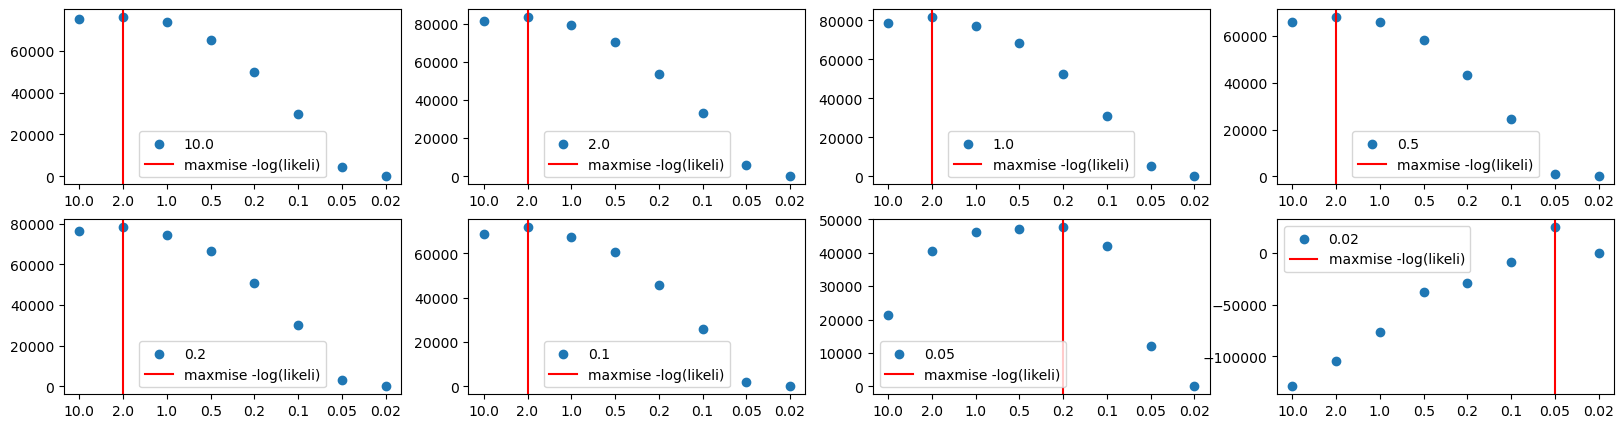

In [15]:
fig, axs = plt.subplots(2,4,figsize=(20,5))
for i in range(1,9):
    row = int((i-0.1)/4)
    col = int((i-0.1)%4)
    ax = axs[row,col]
    pos_le = -R_loglikelihood_sum[i,1:]
    mle = np.where( pos_le == np.min(pos_le))[0][0]
#     print(mle)
    ax.scatter(range(1,9), R_loglikelihood_sum[i,1:],label = np.round(rs[i],2))
    ax.axvline(mle+1, color='red',label='maxmise -log(likeli)')
#     ax.set_yscale('log')
    ax.set_xticks(range(1,9))
    ax.set_xticklabels(np.round(rs[1:],2))
    
    ax.legend()
plt.show()